Лабораторна робота №4
Виконав: Приймак Євгеній, група КА-13

Тема: Побудова моделi згорткових
нейронних мереж для класифiкацiї зображень 

TensorFlow

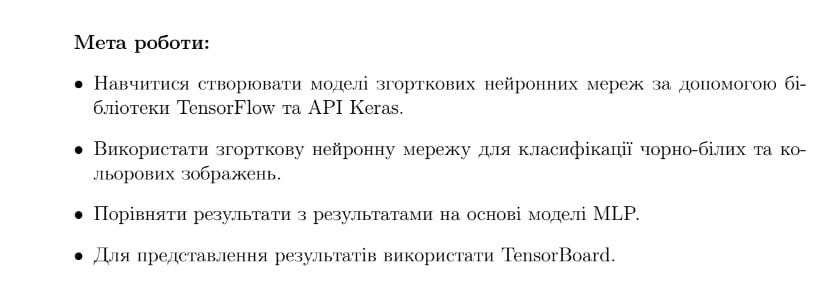

Хід виконання роботи:
1. Завантажити два набори зображень згiдно з варiантом: чорно-бiлi (дивiться по-
переднiй практикум) та кольоровi. Якщо набiр великого розмiру, можна обрати частину.
2. Пiдготувати данi для навчання - за необхiдностi.
3. Роздiлити данi на навчальну, перевiрочну i тестову пiдмножини.
4. Побудувати i навчити базову модель з одним згортковим шаром. Оцiнити пра-
вильнiсть (accuracy) та точнiсть моделi на тренувальнiй i перевiрочнiй множи-
нах.
5. Дослiдити рiзнi значення параметрiв padding i strides згорткового шару ба-
зової моделi, а також розмiрнiсть ядра (kernel) згортки та їх вплив на точнiсть
моделi. На перевiрочнiй множинi обрати значення вказаних параметрiв.
6. Дослiдити кiлька альтернативних архiтектур згорткових моделей, якi включа-
ють

• кiлька згорткових шарiв,
• шар/ шари нормалiзацiї за мiнi-батчами,
• шар/ шари дропуту.

На перевiрочнiй множинi оцiнити якiсть побудованих моделей i обрати най-
кращу архiтектуру. Використати показники якостi: accuracy, precision,recall,

f1-sore, AUC.

7. Чи впливає на правильнiсть (accuracy) моделi додавання регуляризацiї: дропа-
ут, рання зупинка навчання, та використання рiзних методiв iнiцiлiзацiї ваг?

8. Вiдобразити у TensorBoard графiки, якi iлюструють оцiнки якостi навчання
мереж на навчальнiй та перевiрочнiй множинах:
- графiки змiни функцiї втрат на тренувальнiй i перевiрочнiй множинах по мiрi
навчання моделей,
- графiки змiни правильностi моделi на тренувальнiй i перевiрочнiй множинах
по мi
рi навчання моделей.
9. Розрахувати на тестовiй множинi оцiнки якостi обра
  ої найкращої моделi.

10. Завантажити зображення тестової множини i розпiзнати його навченими моде-
лями.

11. Порiвняти побудованi згортковi моделi та багатошаровий персептрон в задачi
класифiкацiї чорно-бiлих та кольорових зображень.
12. Зробити висновки щодо якостi класифiкацiї на основi побудованих моделей.

Варіант 2: Rice Image Dataset, kaggle.com

In [1]:

import numpy as np
import pandas as pd 

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import pathlib
import os
import struct 
import datetime

#loading RICE_IMAGES_DATASET
tf.random.set_seed(42)

train_data_rice = keras.utils.image_dataset_from_directory('E:\MNIST\RICE_IMAGES_DATASET',
                                                 validation_split = 0.2,
                                                        subset = 'training',
                                                        seed = 1,
                                                        shuffle = True,
                                                        batch_size = 32,
                                                       image_size=(256,256))
test_data_rice = keras.utils.image_dataset_from_directory('E:\MNIST\RICE_IMAGES_DATASET',
                                                       validation_split = 0.2,
                                                       subset = 'validation',
                                                       seed = 1,
                                                       shuffle = True,
                                                       batch_size = 32,
                                                    image_size=(256,256))

filenames = pathlib.Path('E:\MNIST\RICE_IMAGES_DATASET')
for label in train_data_rice.class_names :
    images = list(filenames.glob(f'{label}/*'))
    print(f'{label} : {len(images)}')


Found 75000 files belonging to 5 classes.
Using 60000 files for training.
Found 75000 files belonging to 5 classes.
Using 15000 files for validation.
Arborio : 15000
Basmati : 15000
Ipsala : 15000
Jasmine : 15000
Karacadag : 15000


E:\PyCharm\PyCharm projects\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 259s 138ms/step - accuracy: 0.8980 - loss: 10.5076 - val_accuracy: 0.9761 - val_loss: 0.0976
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 256s 136ms/step - accuracy: 0.9834 - loss: 0.0560 - val_accuracy: 0.9793 - val_loss: 0.0743
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 252s 134ms/step - accuracy: 0.9870 - loss: 0.0427 - val_accuracy: 0.9783 - val_loss: 0.0932
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 224s 119ms/step - accuracy: 0.9885 - loss: 0.0392 - val_accuracy: 0.9701 - val_loss: 0.1427
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 239s 127ms/step - accuracy: 0.9877 - loss: 0.0432 - val_accuracy: 0.9751 - val_loss: 0.1213
Epoch 5: early stopping


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │         655,365 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,968,785 (7.51 MB)

 Trainable params: 656,261 (2.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,312,524 (5.01 MB)

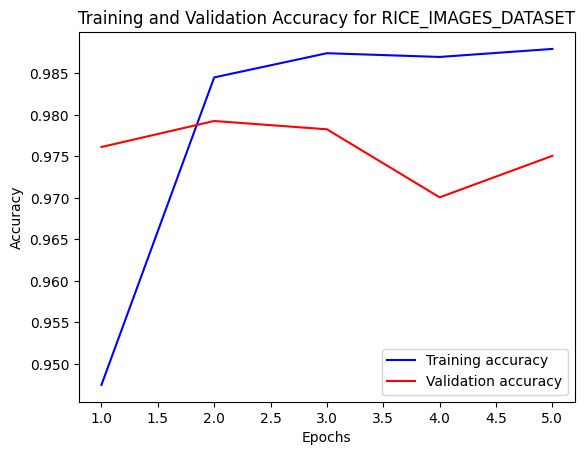

In [2]:
# Побудова та навчання базової моделі з одним згортковим шаром для RICE_IMAGES_DATASET
model_rice = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu', input_shape=(256, 256, 3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(5, activation='softmax')
])

model_rice.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

tensorboard_callback1 = TensorBoard(log_dir='./tf_logs/rice', histogram_freq=1) #Візуалізація в TensorBoard
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

history_rice = model_rice.fit(train_data_rice,
                               validation_data=test_data_rice,
                               epochs=5,
                             callbacks=[early_stopping, tensorboard_callback1])

model_rice.summary()
# Результати оцінки точності на тренувальній та перевірочній множинах
train_acc_rice = history_rice.history['accuracy']
val_acc_rice = history_rice.history['val_accuracy']
epochs_rice = range(1, len(train_acc_rice) + 1)

# Побудова графіків точності
plt.plot(epochs_rice, train_acc_rice, 'b', label='Training accuracy')
plt.plot(epochs_rice, val_acc_rice, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy for RICE_IMAGES_DATASET')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Зазначимо, що в тренуванні моделі дуже допомогла зміна значень kernel_size=(3, 3), strides=(2, 2), padding='same'.
Це сприяло збільшенню швидкості тренування майже в 4 рази на епоху (з 12хв -> 4.25хв), і як наслідок, дозволило розвантажити об'єм потрібної оперативної пам'яті пристрою для опрацювання моделі

Протестуємо створену модель на тестовому наборі даних:

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 118s 63ms/step - accuracy: 0.9887 - loss: 0.0389
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 68ms/step - accuracy: 0.9753 - loss: 0.1230
Train Loss:  0.033576130867004395
Train Accuracy:  0.9900166392326355
*****************************
Test Loss:  0.1212744489312172
Test Accuracy:  0.9750666618347168
              precision    recall  f1-score   support

     Arborio       0.99      0.93      0.96       201
     Basmati       0.99      0.96      0.97       216
      Ipsala       1.00      1.00      1.00       248
     Jasmine       0.95      0.99      0.97       224
   Karacadag       0.95      0.99      0.97       231

    accuracy                           0.97      1120
   macro avg       0.98      0.97      0.97      1120
weighted avg       0.98      0.97      0.97      1120

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


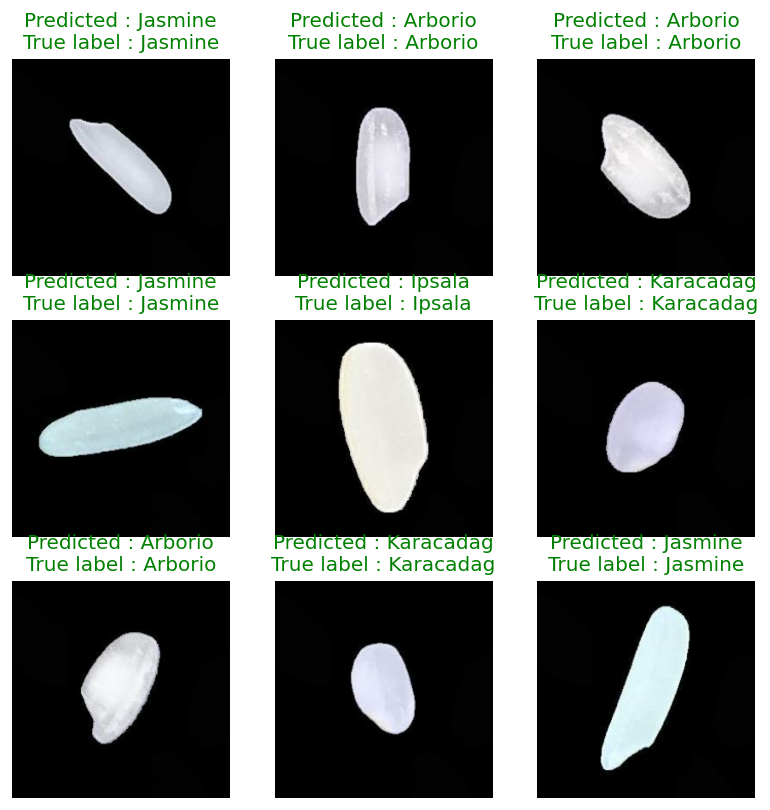

In [3]:
#Testing the performance of the model_rice
X_test, y_test = None, None
for images, labels in test_data_rice.take(35):
    if X_test == None or y_test == None:
        X_test = images
        y_test = labels
    else:
        X_test = tf.concat([X_test, images], axis = 0)
        y_test = tf.concat([y_test, labels], axis = 0)
        
X_test.shape, y_test.shape

from sklearn import metrics
y_pred_proba = model_rice.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis = 1)

metrics.accuracy_score(y_test, y_pred)

train_score = model_rice.evaluate(train_data_rice, verbose= 1)
test_score = model_rice.evaluate(test_data_rice, verbose= 1)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('*****************************')
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

from sklearn.metrics import classification_report
target_names = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
print(classification_report(y_test , y_pred, target_names=target_names))


# plot random images from a given dataset, and compare predictions with truth
def plot_random_predictions(dataset, model):

    shuffled_data = dataset.shuffle(10)
    class_names = dataset.class_names

    for images, labels in shuffled_data.take(1):
        plt.figure(figsize = (8, 8), dpi = 120)
        y_pred_proba = model.predict(images)

    for i in range(9):
        index = random.randint(0, len(images))
        ax = plt.subplot(3,3, i + 1)

        img = images[index].numpy().astype("uint8")
        y_true = class_names[labels[index]]
        y_pred = class_names[np.argmax(y_pred_proba[index], axis = 0)]
      
        c = 'g' if y_pred == y_true else 'r'
      
        plt.imshow(img)
        plt.title(f'Predicted : {y_pred}\nTrue label : {y_true}', c = c)
        plt.axis(False)

#Analyzig random test images
plot_random_predictions(test_data_rice, model_rice)

Можна зробити висновок, що вдалося створити високоточну модель класифікації кольорових зображень, і бібліотека keras може вдало застосовуватися для вирішення даного завдання

Переходимо до опрацювання набору FASHION MNIST:

Fashion MNIST train -  rows: 60000  columns: 785
Fashion MNIST test -  rows: 10000  columns: 785


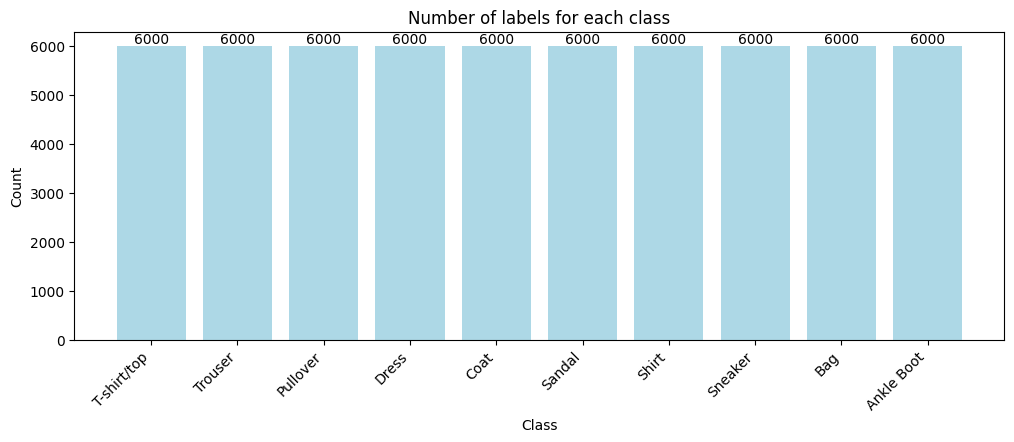

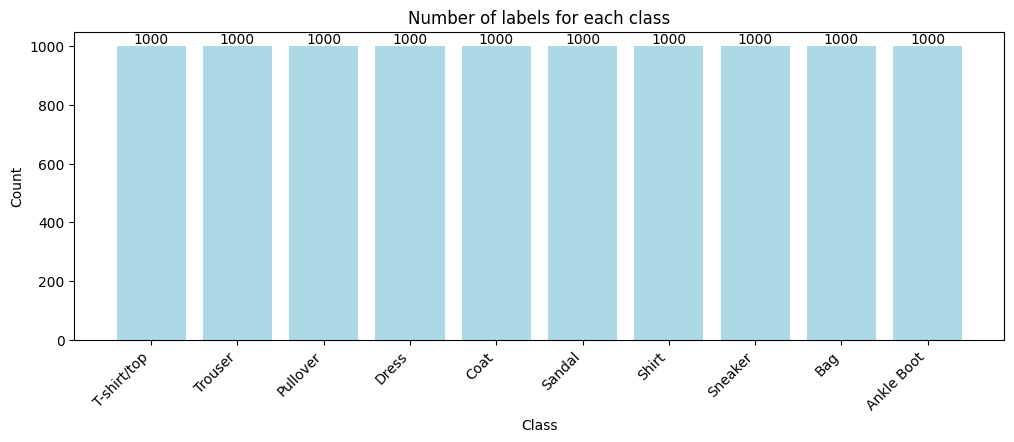

Training set size: 48000 (28, 28, 1)
Validation set size: 12000 (28, 28, 1)
Test set size: 10000  columns: (28, 28, 1)


In [4]:
#loading FASHION dataset
train_data = pd.read_csv('E:/MNIST/FASHION/fashion-mnist_train.csv')
test_data = pd.read_csv('E:/MNIST/FASHION/fashion-mnist_test.csv')

print("Fashion MNIST train -  rows:", train_data.shape[0], " columns:", train_data.shape[1])
print("Fashion MNIST test -  rows:", test_data.shape[0], " columns:", test_data.shape[1])

labels = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def plot_label_per_class(data):
    class_counts = data["label"].value_counts().sort_index()
    class_names = [labels[label] for label in class_counts.index]

    plt.figure(figsize=(12, 4))
    plt.bar(class_names, class_counts, color='lightblue')
    plt.title("Number of labels for each class")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    
    for i, count in enumerate(class_counts):
        plt.text(i, count + 0.1, str(count), ha='center', va='bottom')
    
    plt.show()

plot_label_per_class(train_data)
plot_label_per_class(test_data)

# Data preprocessing
def data_preprocessing(raw):
    # Convert labels to categorical data
    out_y = to_categorical(raw.label, 10)
    # Reshape images and normalize pixel values
    num_images = raw.shape[0]
    x_as_array = raw.values[:, 1:]
    x_shaped_array = x_as_array.reshape(num_images, 28, 28, 1)
    out_x = x_shaped_array / 255.0  # Normalize pixel values to the range [0, 1]
    return out_x, out_y

from sklearn.model_selection import train_test_split

# Prepare the data
x_train, y_train = data_preprocessing(train_data)
x_test, y_test = data_preprocessing(test_data)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=2)
print("Training set size:", x_train.shape[0], x_train.shape[1:])
print("Validation set size:", x_val.shape[0], x_val.shape[1:])
print("Test set size:", x_test.shape[0], " columns:", x_test.shape[1:])


Побудуємо модель з одним згортковим шаром та протестуємо її:

E:\PyCharm\PyCharm projects\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 7, 7, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          31,370 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,266 (126.04 KB)

 Trainable params: 32,138 (125.54 KB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.7341 - loss: 0.7484 - val_accuracy: 0.7922 - val_loss: 1.4435
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.8708 - loss: 0.3629 - val_accuracy: 0.8676 - val_loss: 0.7699
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.8851 - loss: 0.3231 - val_accuracy: 0.8882 - val_loss: 0.3817
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.8929 - loss: 0.3016 - val_accuracy: 0.8982 - val_loss: 0.3017
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.8958 - loss: 0.2902 - val_accuracy: 0.8970 - val_loss: 0.3028
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.8996 - loss: 0.2780 - val_accuracy: 0.8972 - val_loss: 0.3006
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9030 - loss: 0.2678 - val_accuracy: 0.8967 - val_loss: 0.3038
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9040 - loss: 0.2627 - val_accu

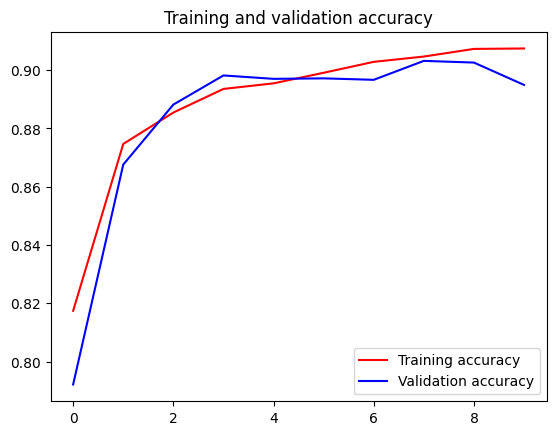

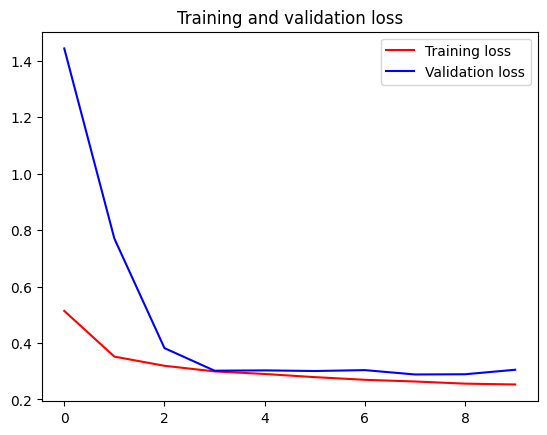

Test loss: 0.2925925552845001
Test accuracy: 0.8998000025749207


In [5]:
# Побудова моделі для FASHION MNIST
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Model
cnn = Sequential()
cnn.add(Conv2D(64, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu', input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))

cnn.add(Flatten())

cnn.add(Dense(10, activation='softmax'))

cnn.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Вивід архітектури моделі
cnn.summary()

tensorboard_callback2 = TensorBoard(log_dir='./tf_logs/fashion_mnist_1conv', histogram_freq=1) #Візуалізація в TensorBoard
# Навчання моделі
train_model = cnn.fit(x_train, y_train,
                  batch_size=256,
                  epochs=10,  
                  validation_data=(x_val, y_val),
                     callbacks=[tensorboard_callback2])  

accuracy = train_model.history['accuracy']
val_accuracy = train_model.history['val_accuracy']
loss = train_model.history['loss']
val_loss = train_model.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Оцінка моделі
score = cnn.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [6]:
# Predictions for the test data
predicted_classes = (cnn.predict(x_test) > 0.5).astype("int32")

# Indices to be plotted
y_true = y_test
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

from sklearn.metrics import classification_report
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
print(classification_report(y_true, predicted_classes, target_names=class_names))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.85      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.96      0.68      0.80      1000
       Dress       0.95      0.89      0.92      1000
        Coat       0.80      0.91      0.85      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.75      0.71      0.73      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.97      0.98      0.97      1000
  Ankle Boot       0.97      0.95      0.96      1000

   micro avg       0.92      0.89      0.90     10000
   macro avg       0.92      0.89      0.90     10000
weighted avg       0.92      0.89      0.90     10000
 samples avg       0.89      0.89      0.89     10000



E:\PyCharm\PyCharm projects\venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


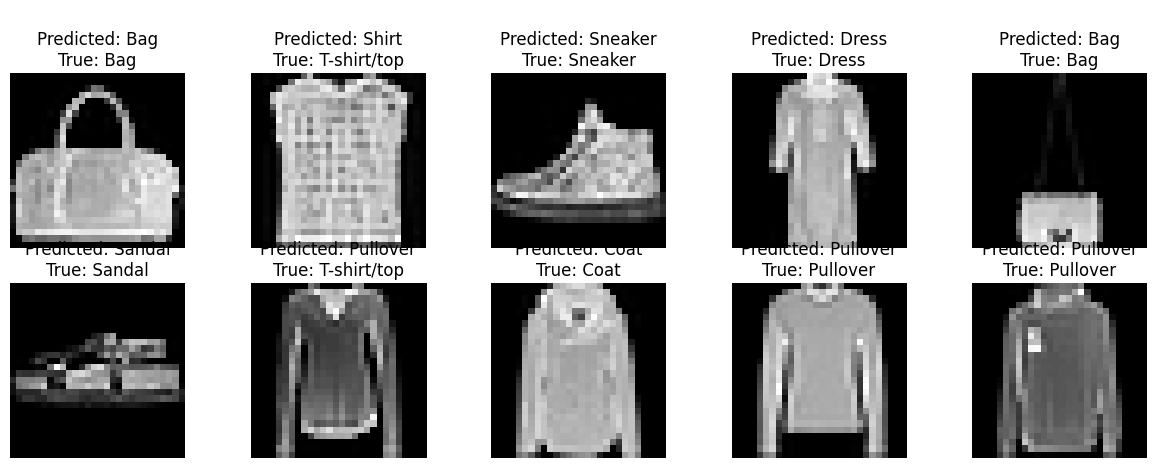

In [7]:
import random

# Вибір рандомних індексів
random_indices = random.sample(range(len(x_test)), 10)

# Відображення зображень та класифікацій
plt.figure(figsize=(15, 5))
for i, idx in enumerate(random_indices, 1):
    plt.subplot(2, 5, i)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    predicted_label = class_names[np.argmax(predicted_classes[idx])]
    true_label = class_names[np.argmax(y_true[idx])]
    plt.title(f'\nPredicted: {predicted_label}\nTrue: {true_label}')
    plt.axis('off')
plt.show()

Спробуємо покращити архітектуру моделі, додавши 4 згорткових шарів, дропаут, ранню зупинку навчання, також збільшимо к-сть епох навчання:

E:\PyCharm\PyCharm projects\venv\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
E:\PyCharm\PyCharm projects\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization_1                │ (None, 28, 28, 1)           │               4 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 3, 3, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 3, 3, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 2, 2, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 1, 1, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │          33,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 103,534 (404.43 KB)

 Trainable params: 103,468 (404.17 KB)

 Non-trainable params: 66 (264.00 B)

Epoch 1/35
188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.5489 - loss: 1.2362 - val_accuracy: 0.5462 - val_loss: 1.3762
Epoch 2/35
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.8095 - loss: 0.5212 - val_accuracy: 0.8517 - val_loss: 0.4875
Epoch 3/35
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.8367 - loss: 0.4485 - val_accuracy: 0.8662 - val_loss: 0.3688
Epoch 4/35
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.8495 - loss: 0.4125 - val_accuracy: 0.8735 - val_loss: 0.3462
Epoch 5/35
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.8568 - loss: 0.3887 - val_accuracy: 0.8777 - val_loss: 0.3314
Epoch 6/35
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.8628 - loss: 0.3735 - val_accuracy: 0.8832 - val_loss: 0.3149
Epoch 7/35
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.8716 - loss: 0.3516 - val_accuracy: 0.8871 - val_loss: 0.3068
Epoch 8/35
188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.8747 - loss: 0.3409 - val_accu

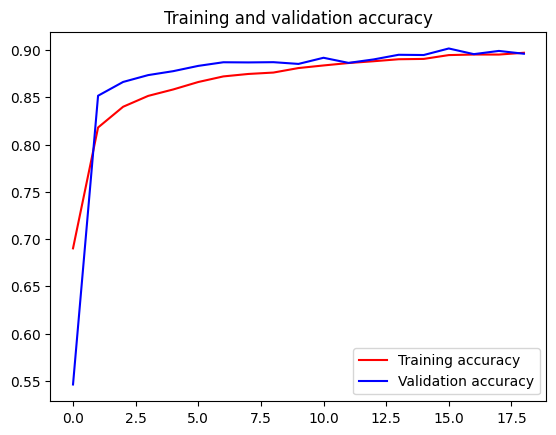

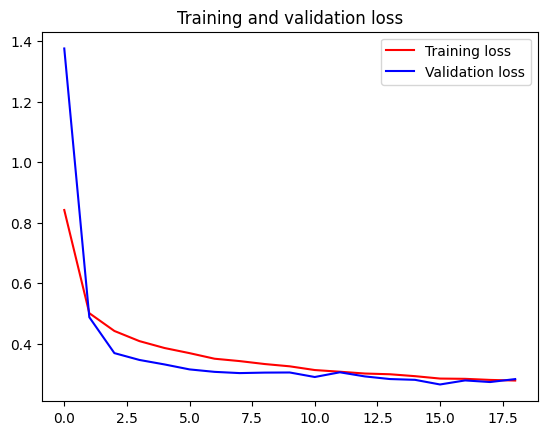

Test loss: 0.273257851600647
Test accuracy: 0.8980000019073486
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.86      0.81      0.84      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.84      0.86      0.85      1000
       Dress       0.87      0.94      0.90      1000
        Coat       0.90      0.77      0.83      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.81      0.59      0.69      1000
     Sneaker       0.95      0.95      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle Boot       0.96      0.96      0.96      1000

   micro avg       0.92      0.88      0.90     10000
   macro avg       0.92      0.88      0.90     10000
weighted avg       0.92      0.88      0.90     10000
 samples avg       0.88      0.88      0.88     10000



E:\PyCharm\PyCharm projects\venv\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


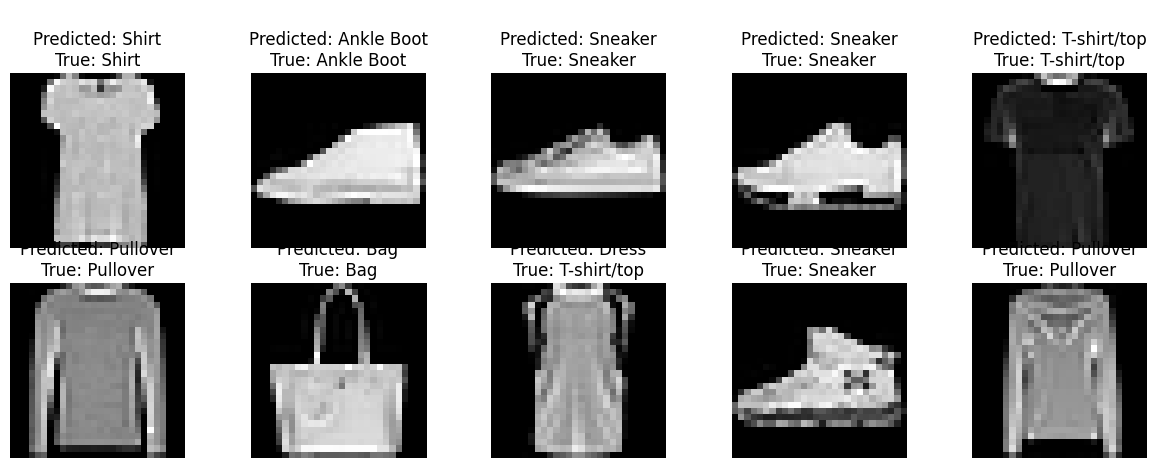

In [8]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import EarlyStopping

cnn1 = Sequential()
cnn1.add(BatchNormalization(input_shape=(28, 28, 1)))
cnn1.add(Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu', input_shape=(28, 28, 1)))
cnn1.add(Conv2D(32, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.25))

cnn1.add(BatchNormalization())
cnn1.add(Conv2D(64, kernel_size=(3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn1.add(Conv2D(64, kernel_size=(3, 3),strides=(2, 2), padding='same', activation='relu'))
cnn1.add(Dropout(0.25))

cnn1.add(Flatten())
cnn1.add(Dense(512, activation='relu'))
cnn1.add(Dropout(0.5))

cnn1.add(Dense(10, activation='softmax'))

cnn1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
tensorboard_callback3 = TensorBoard(log_dir='./tf_logs/fashion_mnist_4conv', histogram_freq=1) #Візуалізація в TensorBoard
# Вивід архітектури моделі
cnn1.summary()

# Навчання моделі
train_model1 = cnn1.fit(x_train, y_train,
                  batch_size=256,
                  epochs=35,  
                  validation_data=(x_val, y_val), callbacks=[early_stopping, tensorboard_callback3])  

accuracy1 = train_model1.history['accuracy']
val_accuracy1 = train_model1.history['val_accuracy']
loss1 = train_model1.history['loss']
val_loss1 = train_model1.history['val_loss']
epochs1 = range(len(accuracy1))

plt.plot(epochs1, accuracy1, 'r', label='Training accuracy')
plt.plot(epochs1, val_accuracy1, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs1, loss1, 'r', label='Training loss')
plt.plot(epochs1, val_loss1, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Оцінка моделі
score1 = cnn1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])


# Predictions for the test data
predicted_classes = (cnn1.predict(x_test) > 0.5).astype("int32")

# Indices to be plotted
y_true = y_test
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

from sklearn.metrics import classification_report
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
print(classification_report(y_true, predicted_classes, target_names=class_names))

# Вибір рандомних індексів
random_indices = random.sample(range(len(x_test)), 10)

# Відображення зображень та класифікацій
plt.figure(figsize=(15, 5))
for i, idx in enumerate(random_indices, 1):
    plt.subplot(2, 5, i)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    predicted_label = class_names[np.argmax(predicted_classes[idx])]
    true_label = class_names[np.argmax(y_true[idx])]
    plt.title(f'\nPredicted: {predicted_label}\nTrue: {true_label}')
    plt.axis('off')
plt.show()

Як бачимо по необхідній кількості епох для досягання визначеної точності, згорткова модель набагато краще впоралася з класифікацією обох типів зображень, ніж реалізований вручну багатошаровий персептрон з попередньої роботи (Внаслідок задіяних інструментів keras для класифікації наборів).

Для порівняння наведемо графік accuracy з попередньої роботи:

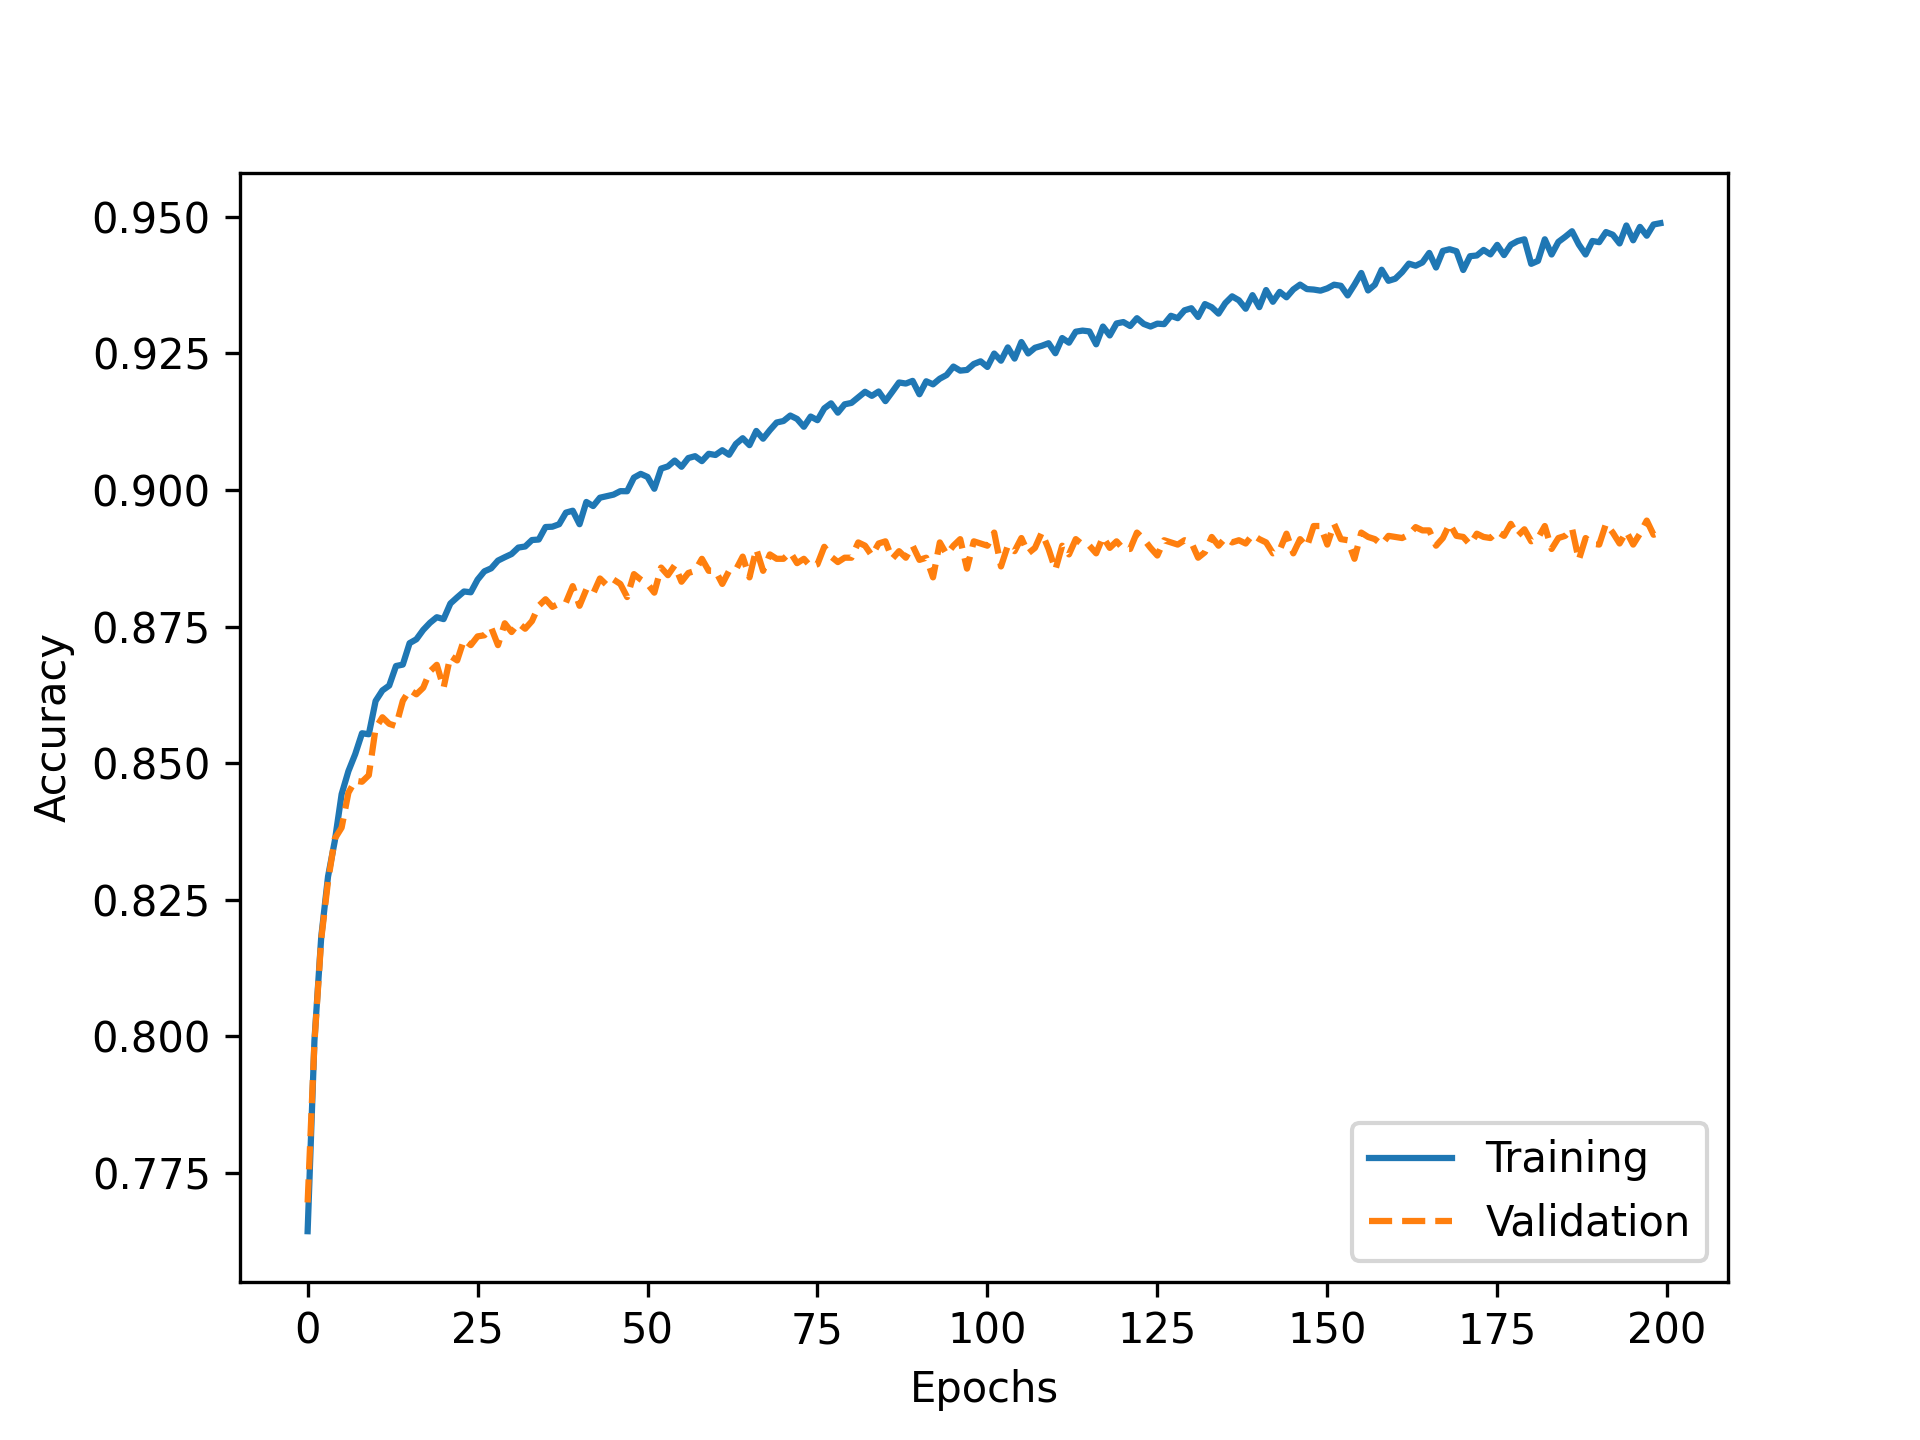